<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_7%EC%9E%A5_%EC%95%99%EC%83%81%EB%B8%94_%ED%95%99%EC%8A%B5%EA%B3%BC_%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_p_257_272.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

#5장에서 소개한 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 7.5 부스팅

- 약한 학습기(Weak Learner) 여러 개를 결합하여 강한 학습기(Strong Learner)를 만드는 앙상블 기법
- 각 모델이 이전 모델의 오류를 보완하도록 학습하는 방식으로 동작

## 🔹대표적인 부스팅 기법

1. AdaBoost (Adaptive Boosting)
   - 가중치를 조정하여 잘못 분류된 샘플에 집중하는 방식  
2. Gradient Boosting
   - 손실 함수의 그래디언트를 활용하여 순차적으로 모델을 개선하는 방식  


## 7.5.1 에이다부스트

- 핵심 아이디어 : 잘못 분류된 샘플의 가중치를 증가시켜 새로운 예측기가 이를 더 잘 학습하도록 만드는 것

### 📌 학습 과정
1. 첫 번째 기반 학습기(예: 결정 트리)를 훈련하고 예측 수행  
2. 잘못 분류된 샘플의 가중치를 증가  
3. 두 번째 학습기는 업데이트된 가중치를 반영하여 훈련  
4. 위 과정을 반복하여 점점 더 어려운 샘플을 잘 예측하는 모델을 만듦  


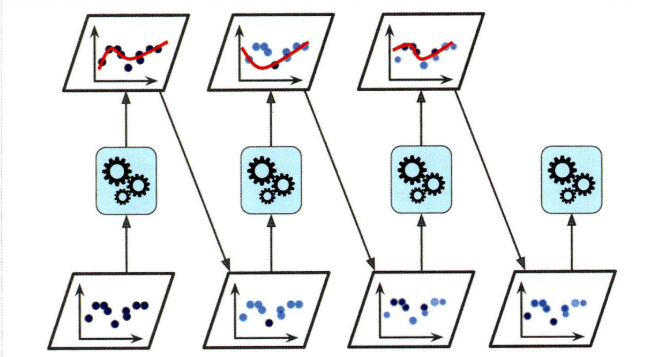

## 🔹 AdaBoost의 학습 과정과 특징

- 잘못 분류된 샘플의 가중치를 증가시키면서 반복적으로 새로운 예측기를 학습  
- 이 과정은 경사하강법과 유사하게 점진적으로 성능을 향상시키는 방식

### 📌 학습 과정 예시 (Moons 데이터셋)
- 첫 번째 분류기가 많은 샘플을 잘못 분류 → 해당 샘플들의 가중치 증가  
- 두 번째 분류기는 가중치가 높아진 샘플을 더 정확히 예측  
- 이를 반복하여 점점 더 정교한 예측기 추가  
- 학습률을 조절하면 (예: 절반으로 감소) 변화 속도를 조정 가능  

### 📌 최종 예측 방식
- 모든 예측기가 훈련된 후 앙상블 방식으로 예측 수행  
- 개별 예측기의 정확도에 따라 가중치를 다르게 적용하여 최종 예측 결정  

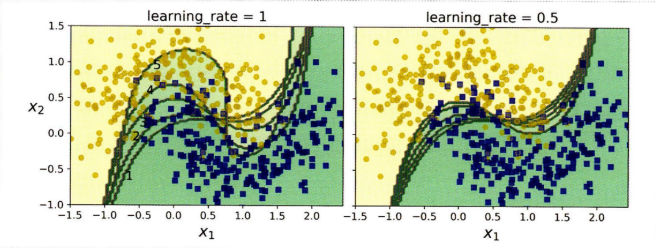

## 🔹 AdaBoost 알고리즘 상세 과정

### 📌 1. 샘플 가중치 초기화
각 샘플의 가중치 $w(i)$ 는 **초기에 동일한 값**으로 설정됨  

$$
w(i) = \frac{1}{m}
$$

즉, 모든 샘플이 동일한 중요도를 가짐  

### 📌 2. 첫 번째 예측기 학습 & 가중치 적용 에러율 계산
첫 번째 예측기가 학습된 후, **가중치가 적용된 에러율**을 계산  

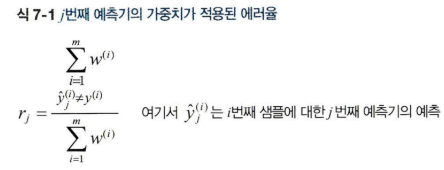




##🔹 예측기 가중치 계산 (AdaBoost)

예측기의 가중치 **$\alpha_j$**:

$$
\alpha_j = \eta \log \frac{1 - r_j}{r_j}
$$

여기서:  
- **$\eta$** : 학습률 하이퍼파라미터 (기본값 = 1)  
- **$r_j$** : $j$번째 예측기의 오류율  

🔹 **가중치의 의미**  
- 예측기가 정확할수록 **가중치 $\alpha_j$가 커짐**  
- 무작위로 예측하는 수준이면 **$\alpha_j$는 0에 가까움**  
- 무작위보다 더 나쁘면 **$\alpha_j$는 음수**가 됨 🚀


## 🔹 샘플 가중치 업데이트 (AdaBoost)

AdaBoost 알고리즘은 다음과 같은 가중치 업데이트 규칙을 사용:

$$
w^{(i)} =
\begin{cases}
w^{(i)}, &  (\hat{y}_j^{(i)} = y^{(i)}) \\
w^{(i)} \cdot \exp(\alpha_j), &  (\hat{y}_j^{(i)} \neq y^{(i)})
\end{cases}
$$

여기서:  
- **$w^{(i)}$** : $i$번째 샘플의 기존 가중치  
- **$\alpha_j$** : $j$번째 예측기의 가중치  
- **$\hat{y}_j^{(i)}$** : $j$번째 예측기의 예측값  
- **$y^{(i)}$** : 실제값  


### 📌 **가중치 정규화**  
모든 샘플의 가중치를 합이 1이 되도록 **정규화**합니다:

$$
w^{(i)} = \frac{w^{(i)}}{\sum_{i=1}^{m} w^{(i)}}
$$

✅ **잘못 분류된 샘플의 가중치는 $w^{(i)} \cdot \exp(\alpha_j)$로 증가**  
✅ **정확히 분류된 샘플의 가중치는 그대로 유지**  
➡️ **다음 예측기가 더 어려운 샘플에 집중하도록 유도** 🚀  


## 🔹 AdaBoost 예측 과정  

AdaBoost는 새로운 예측기를 **업데이트된 가중치**를 사용해 훈련시키고, 이 과정을 반복  
➡️ **반복 종료 조건:**  
- 지정된 예측기 개수에 도달  
- 완벽한 예측기가 생성  

### 📌 **최종 예측 방법**  

에이다부스트는 모든 예측기의 예측 결과를 **가중치 $\alpha_j$**를 반영해 결합.  
가장 높은 가중치 합을 가진 클래스가 최종 예측이 됨.

$$
\hat{y}(x) = \arg\max_k \sum_{j=1}^{N} \alpha_j (\hat{y}_j(x) = k)
$$

여기서:  
- **$N$** : 예측기 개수  
- **$\alpha_j$** : $j$번째 예측기의 가중치  
- **$\hat{y}_j(x)$** : $j$번째 예측기의 예측값  
- **$\mathbb{1}(\hat{y}_j(x) = k)$** : 예측 결과가 클래스 $k$일 때 1, 아니면 0  

✅ **가중치가 큰 예측기일수록 더 중요한 역할을 함**  
✅ **최종 예측은 가중합이 가장 큰 클래스로 결정됨** 🚀  


## 🔹 사이킷런의 AdaBoost 구현  

사이킷런은 **SAMME**(Stagewise Additive Modeling using a Multi-class Exponential loss) 알고리즘을 사용하여 **다중 클래스 AdaBoost**를 구현.  

✅ **이진 분류**에서는 일반 AdaBoost와 동일  
✅ **다중 클래스 분류**에서는 SAMME 사용  
✅ **추정기가 확률 예측 가능** → **SAMME.R**(Real 버전) 사용 → **일반적으로 성능 향상**  

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 기반 AdaBoost 분류기 생성
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # 깊이가 1인 얕은 트리 사용
    n_estimators=200,  # 200개의 약한 학습기 사용
    algorithm="SAMME",  # SAMME 사용 (SAMME.R 대신)
    learning_rate=0.5
)

# 모델 학습
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

## 7.5.2 그레이디언트 부스팅

- 에이다부스트와 비슷하게 순차적으로 예측기를 추가하는 앙상블 방법
- 에이다부스트와의 주요 차이점 : 샘플의 가중치를 수정하는 대신, 이전 예측기가 만든 잔여 오차(residual error)에 새로운 예측기를 학습시킨다는 점  

### 📌 **그레이디언트 부스팅 특징**  
- 오차 보정 방식: 이전 예측기의 잔여 오차에 대해 새로운 예측기를 훈련  
- 주로 회귀 문제에 사용: 특히 DecisionTreeRegressor와 결합하여 사용됨  
- GBRT (Gradient Boosted Regression Tree): 결정 트리를 기반으로 한 그레이디언트 부스팅 회귀 트리  

### 📌 **예시: 그레이디언트 부스팅 회귀**  

그레이디언트 부스팅을 사용해 잡음이 섞인 2차 곡선 형태의 훈련 세트를 학습시키면 매우 잘 작동함  

➡️ **회귀 문제에서 뛰어난 성능을 보임** 🚀  

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [15]:
# 첫 번째 예측기에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor를 훈련
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [16]:
# 두 번째 예측기가 만든 잔여 오차에 세 번째 회귀 모델을 훈련
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [19]:
# 새로운 샘플에 대한 예측
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

[그림 7-9]

- **왼쪽 열**: 각 트리의 예측 결과  
- **오른쪽 열**: 앙상블의 예측 결과  

### 📌 **예측 과정**  
1. **첫 번째 행**: 앙상블에 트리가 하나만 있어, 첫 번째 트리의 예측과 동일  
2. **두 번째 행**: 새로운 트리가 첫 번째 트리의 잔여 오차에 대해 학습되어, 앙상블 예측은 두 트리 예측의 합과 같음  
3. **세 번째 행**: 또 다른 트리가 두 번째 트리의 잔여 오차에 학습되어 예측이 점차 개선됨  

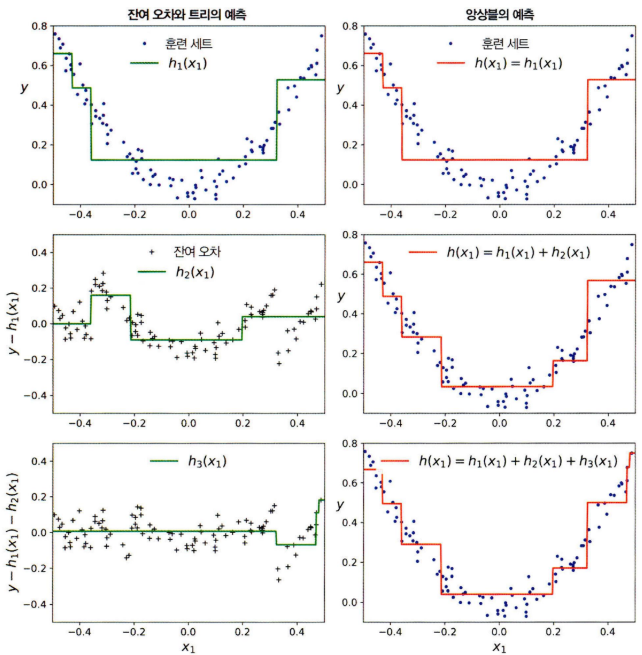

### 📌 **사이킷런으로 GBRT 훈련**  
- 사이킷런의 `GradientBoostingRegressor`를 사용하면 GBRT 앙상블을 간단하게 훈련시킬 수 있음
- 제어 매개변수: 트리 수(`n_estimators`), 트리 성장 매개변수(`max_depth`, `min_samples_leaf`)는 `RandomForestRegressor`와 유사함  

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

- `learning_rate` :  각 트리의 기여 정도를 조절  
- 작은 `learning_rate` (예: 0.1)로 설정하면 앙상블을 훈련 세트에 학습시키기 위해 더 많은 트리가 필요하지만, 예측 성능은 일반적으로 향상됨

=>  축소(shrinkage)라고 하는 규제 방법

[그림 7-10]
- 왼쪽: 트리가 충분히 적어 훈련 세트를 제대로 학습하지 못함  
- 오른쪽: 트리가 너무 많아 훈련 세트에 과대적합됨

📌 **결론**

`learning_rate`가 작을수록 과대적합을 방지하고 성능을 향상시킬 수 있지만, 더 많은 트리가 필요함


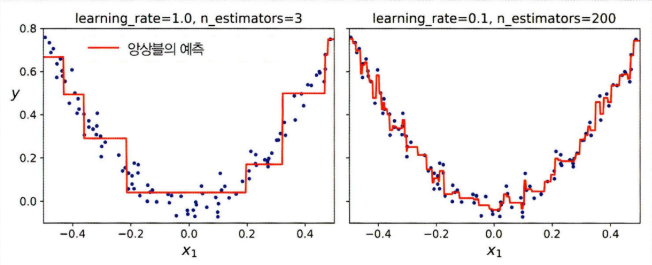

## 🔹 최적의 트리 수 찾기: 조기 종료 (Early Stopping)

- 구현 방법 : `staged_predict()` 메서드 사용. 이 메서드는 훈련의 각 단계(트리 하나씩 추가될 때)에서 생성된 예측기를 순회하는 반복자(iterator)를 반환  

### 📌 **장점**
- 검증 오차를 바탕으로 과대적합을 방지하며, 최적의 트리 수를 찾을 수 있음


1. 훈련: 120개의 트리로 GBRT 앙상블 훈련
2. 검증 오차 측정: 각 훈련 단계에서 검증 오차를 측정하여 최적의 트리 수 찾기
3. 최적 트리 수로 재훈련: 최적의 트리 수를 사용해 새로운 GBRT 앙상블을 훈련

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=117)

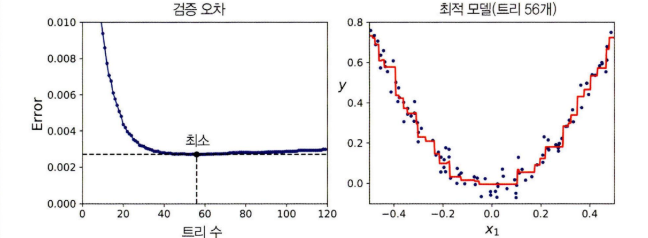

- warm_start=True: 기존 트리를 유지하고 추가 훈련을 진행할 수 있음
- 이를 통해 훈련 중지를 구현할 수 있으며, 일정 반복 동안 검증 오차가 향상되지 않으면 훈련을 멈출 수 있음

 - 연속해서 다섯 번의 반복 동안 검증 오차가 향상되지 않으면 훈련을 멈춤

In [23]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break # 조기 종료

## 🔹 **확률적 그레이디언트 부스팅 (Stochastic Gradient Boosting)**

- `subsample` : 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정  
- 예를 들어, **`subsample=0.25`**로 설정하면 각 트리는 무작위로 선택된 **25%**의 훈련 샘플로 학습됨
  
### 📌 **효과**
- 편향은 높아지지만, 분산은 낮아지며 훈련 속도가 상당히 빨라짐

## 🔹 **최적화된 그레이디언트 부스팅 구현 : XGBoost**

- 목표: 빠른 속도, 확장성, 이식성을 제공
- 사용처: 머신러닝 경연 대회에서 우승 후보들이 자주 사용하는 도구
- API: 사이킷런과 유사하여 사용이 간편

### 📌 **특징**
- 빠른 속도와 높은 성능으로 주목받고 있으며, 확장성과 이식성이 뛰어남


In [30]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [34]:
pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [37]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds = 2)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_test, y_test)])

y_pred = xgb_reg.predict(X_test)

[0]	validation_0-rmse:0.35281
[1]	validation_0-rmse:0.25366
[2]	validation_0-rmse:0.18251
[3]	validation_0-rmse:0.13142
[4]	validation_0-rmse:0.09470
[5]	validation_0-rmse:0.06829
[6]	validation_0-rmse:0.04929
[7]	validation_0-rmse:0.03537
[8]	validation_0-rmse:0.02528
[9]	validation_0-rmse:0.01843
[10]	validation_0-rmse:0.01373
[11]	validation_0-rmse:0.01051
[12]	validation_0-rmse:0.00870
[13]	validation_0-rmse:0.00748
[14]	validation_0-rmse:0.00673
[15]	validation_0-rmse:0.00637
[16]	validation_0-rmse:0.00626
[17]	validation_0-rmse:0.00623
[18]	validation_0-rmse:0.00625
[19]	validation_0-rmse:0.00629


# 7.6 스태킹

- 여러 개의 예측기의 예측 결과를 단순히 취합하는 것이 아니라, 이 예측 결과들을 바탕으로 또 다른 모델을 학습시켜 최종 예측을 만드는 방식.


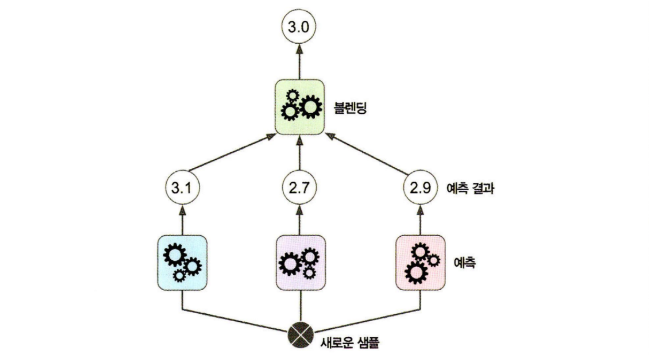

<스태킹에서 블렌더 학습 방법>

- 블렌더(메타 학습기)를 학습시키는 일반적인 방법 : 홀드 아웃 세트를 사용하는 것

1. 훈련 세트를 두 개의 서브셋으로 나눔. 첫 번째 서브셋은 첫 번째 레이어 예측기를 훈련하는 데 사용됨
2. 첫 번째 레이어의 예측기를 사용해 두 번째 홀드 아웃 세트에 대한 예측을 만듦. 이때 예측기들은 이 샘플을 전혀 보지 못했기 때문에 새로운 예측이 생성됨.
3. 홀드 아웃 세트의 각 샘플에 대해 예측값 3개가 만들어지고, 이를 새로운 훈련 세트로 사용하여 블렌더를 훈련시킴. 이때, 첫 번째 레이어의 예측값을 입력으로 사용하여 타깃값을 예측하도록 학습시킴.


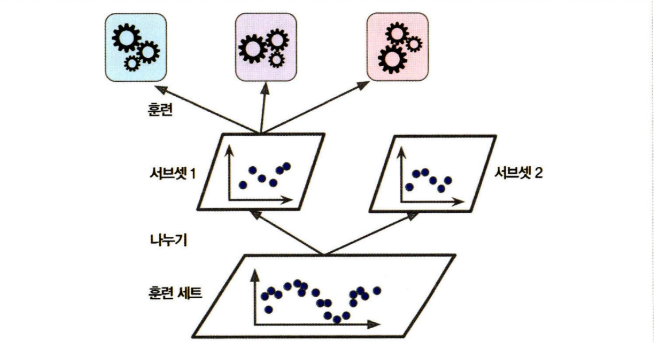

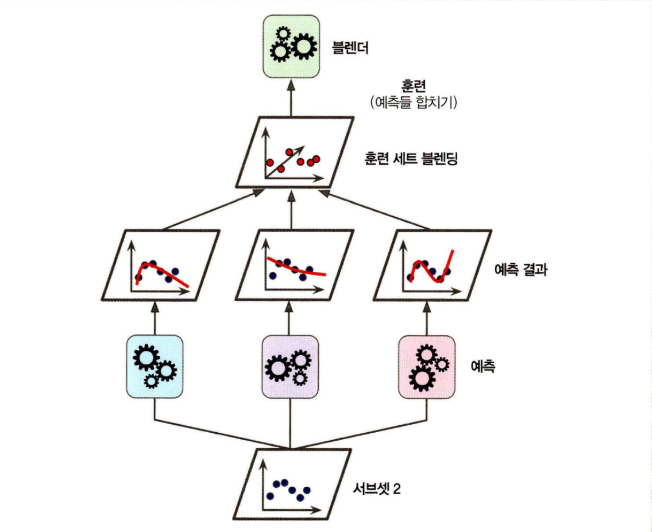

< 여러 블렌더 훈련 방식>

- 이 방식을 구현하려면 훈련 세트를 세 개의 서브셋으로 나눔:
1. 첫 번째 서브셋은 첫 번째 레이어를 훈련시키는 데 사용.
2. 두 번째 서브셋은 첫 번째 레이어의 예측기를 사용해 두 번째 레이어를 훈련시키기 위한 훈련 세트를 만듦.
3. 세 번째 서브셋은 두 번째 레이어의 예측기로 세 번째 레이어를 훈련시키기 위한 세트를 만듦.

작업이 끝나면 각 레이어를 차례대로 실행하여 새로운 샘플에 대한 예측을 할 수 있음.

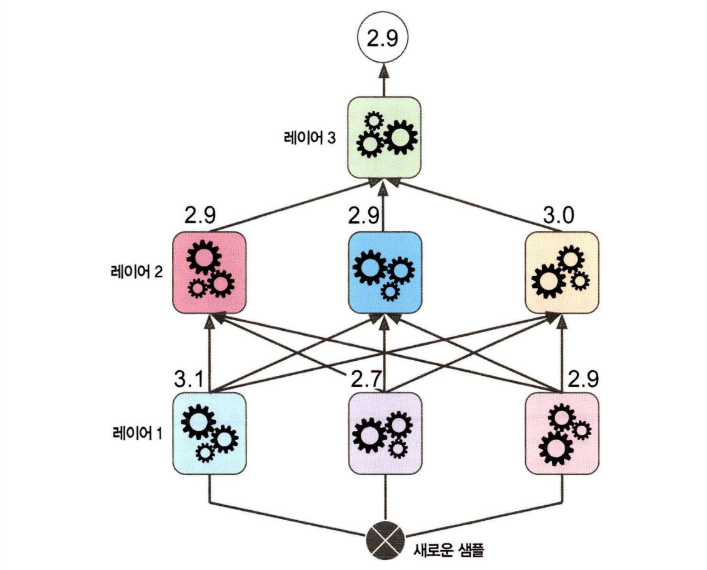
